In [1]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
name = 'RNAVAL.NS'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2022-09-10")
x = df['Close']

In [3]:
returns = x.pct_change(1).dropna()

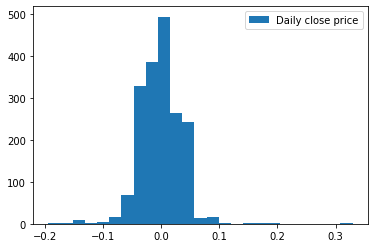

In [4]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

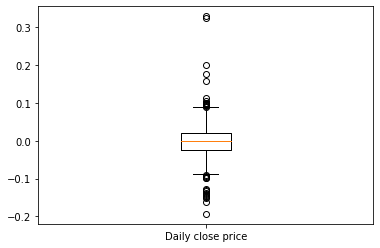

In [5]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

In [6]:
np.mean(returns)

-0.0008358606304688256

In [7]:
np.std(returns)

0.03593671936265562

In [8]:
np.quantile(returns, 0.5)

-0.0008340156200874471

In [9]:
skew(returns)

0.7356203240557248

In [10]:
skewtest(returns)

SkewtestResult(statistic=11.662645778219417, pvalue=1.977988966477247e-31)

In [11]:
kurtosis(returns)

9.020507065330559

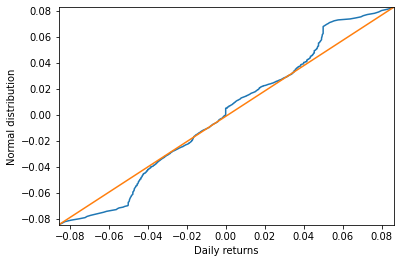

In [12]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

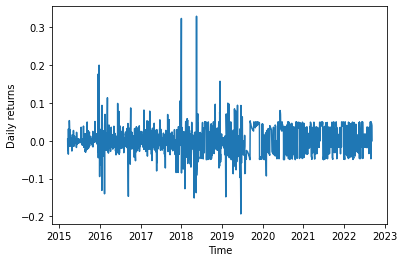

In [13]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

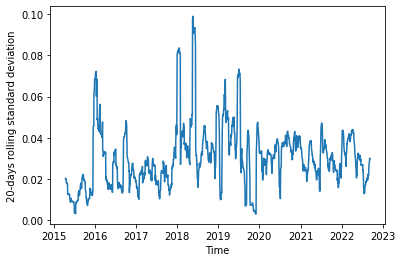

In [14]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


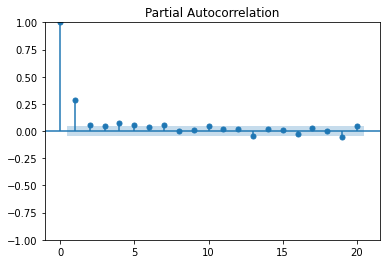

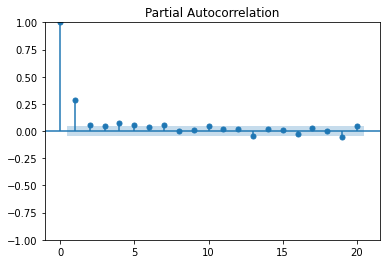

In [15]:
plot_pacf(returns,lags=20)

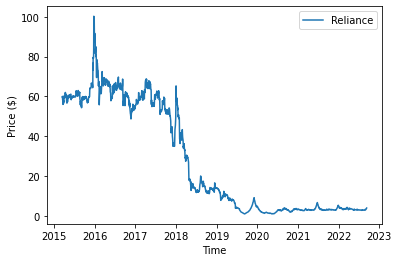

In [17]:
plt.plot(x,label="Reliance")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()